### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 6

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Стелина Петрити
##### Группа:   НПИбд-02-21

## Москва 2024
***

### Вариант № 9
No NaN

Вариант 9
1. Abalone Data Set
2. Название файла: abalone.data
3. Ссылка: http://archive.ics.uci.edu/ml/datasets/Abalone
4. Класс: Sex (столбец No 1)
5. Метод обработки пропущенных значений – среднее значение признака
6. Метод нормализации признаков – стандартизация
7. Алгоритм снижения размерности данных – удаление признаков с более низкой дисперсией
8. Дополнительные базовые классификаторы:
* наивный байесовский классификатор
* классификатор ближайших соседей (к-во соседей = 7)
9. Комбинированный классификатор: StackingClassifier
10. Ансамблевые классификаторы: BaggingClassifier, AdaBoostClassifier
11. Показатель качества модели – полнота (recall)








In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.	 Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов


In [ ]:
import pandas as pd

# Задаем путь к файлу
path = '/content/drive/MyDrive/viti 4/Data mining/Lab 6/abalone.data'

# Загружаем данные, включая только столбец 0 (Sex)
data = pd.read_csv(path, header=None, usecols=[0])

# Переименовываем столбец для удобства
data.columns = ['Sex']

# Выводим первые несколько строк, чтобы убедиться, что данные загружены корректно
print(data.head())


  Sex
0   M
1   M
2   F
3   M
4   I


###2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Преобразуйте категориальные признаки в числовые при помощи кодирования меток (label encoding). Если в признаках имеются пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если в признаках пропущенных значений нет, то удалите из набора данных записи, идентифицированные как выбросы при помощи метода кластеризации DBSCAN.



In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN

# Загружаем данные, включая все столбцы
data = pd.read_csv(path, header=None)

# Переименовываем столбцы для удобства
data.columns = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight',
                'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']

#  Удаляем записи с пропущенными метками класса
data.dropna(subset=['Sex'], inplace=True)

#  Преобразуем категориальные признаки в числовые при помощи кодирования меток
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])

# Проверяем на наличие пропущенных значений в других признаках
if data.isnull().values.any():
    # Заменяем пропущенные значения средним значением признака
    data.fillna(data.mean(), inplace=True)

# Удаление выбросов при помощи метода кластеризации DBSCAN
# Настраиваем DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Применяем DBSCAN к числовым признакам
# Для этого выбираем все столбцы, кроме 'Sex'
nr_features = data.select_dtypes(include=[np.number])
outliers = dbscan.fit_predict(nr_features)

# Добавляем метки выбросов в данные
data['Outlier'] = outliers

# Удаляем выбросы (где outlier == -1) и создаем новый DataFrame
data_cleaned = data[data['Outlier'] != -1].copy()

# Удаляем временный столбец 'Outlier' без изменения оригинального DataFrame
data_cleaned = data_cleaned.drop(columns=['Outlier'])

# Выводим очищенные данные
print(data_cleaned.head())

   Sex  Length  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  \
0    2   0.455     0.365   0.095       0.5140         0.2245         0.1010   
1    2   0.350     0.265   0.090       0.2255         0.0995         0.0485   
2    0   0.530     0.420   0.135       0.6770         0.2565         0.1415   
3    2   0.440     0.365   0.125       0.5160         0.2155         0.1140   
4    1   0.330     0.255   0.080       0.2050         0.0895         0.0395   

   ShellWeight  Rings  
0        0.150     15  
1        0.070      7  
2        0.210      9  
3        0.155     10  
4        0.055      7  


###3. Используя метод снижения размерности данных, указанный в индивидуальном задании, определите и оставьте в наборе данных не более четырех признаков.




In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Снижение размерности: Удаление признаков с низкой дисперсией
# Устанавливаем порог дисперсии
var_threshold = VarianceThreshold(threshold=0.1)  # Порог можно настроить

# Обучаем модель порога дисперсии и преобразуем очищенные данные
reducing_data = var_threshold.fit_transform(data_cleaned)

# Преобразуем очищенный массив обратно в DataFrame
feature_names = data_cleaned.columns[var_threshold.get_support()]
reducing_dataframe = pd.DataFrame(reducing_data, columns=feature_names)

# Убедимся, что DataFrame содержит не более четырех признаков
if reducing_dataframe.shape[1] > 4:
    print("После применения порога дисперсии имеется более 4 признаков. Уменьшаем количество.")
    reducing_dataframe = reducing_dataframe.iloc[:, :4]  # Оставляем только первые четыре признака

# Выводим уменьшенный DataFrame
print(reducing_dataframe.head())


   Sex  WholeWeight  Rings
0  2.0       0.5140   15.0
1  2.0       0.2255    7.0
2  0.0       0.6770    9.0
3  2.0       0.5160   10.0
4  1.0       0.2050    7.0


###4. Нормализуйте оставшиеся признаки набора данных методом, указанным в индивидуальном задании.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Стандартизация оставшихся признаков
scaler = StandardScaler()

# Применяем стандартизацию к оставшимся признакам
standart_data = scaler.fit_transform(reducing_dataframe)

# Преобразуем нормализованный массив обратно в DataFrame
normalization_dataframe = pd.DataFrame(standart_data, columns=reducing_dataframe.columns)

# Выводим нормализованный DataFrame
print(normalization_dataframe.head())


        Sex  WholeWeight     Rings
0  1.149544    -0.640151  1.730149
1  1.149544    -1.239062 -0.941745
2 -1.283322    -0.301772 -0.273772
3  1.149544    -0.635999  0.060215
4 -0.066889    -1.281619 -0.941745


###5. Визуализируйте набор данных в виде точек в трехмерном пространстве, отображая точки разных классов разными цветами. При визуализации набора данных используйте три признака с наиболее высокой оценкой важности. В качестве подписей осей используйте названия признаков. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.


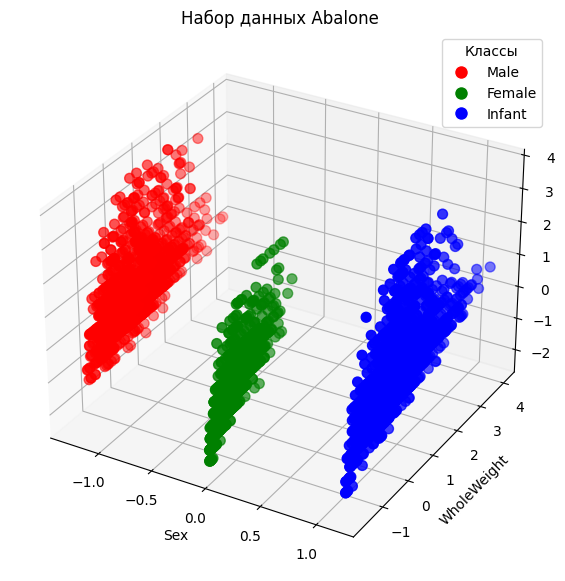

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Визуализация данных в 3D пространстве с использованием трех признаков
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Цвета для классов ('Sex')
colors = {0: 'r', 1: 'g', 2: 'b'}  # Задаем разные цвета для классов
class_labels = data_cleaned['Sex']

# Отображение точек
ax.scatter(normalization_dataframe['Sex'], normalization_dataframe['WholeWeight'], normalization_dataframe['Rings'],
           c=class_labels.map(colors), s=50)

# Настройка подписей осей и графика
ax.set_xlabel('Sex')
ax.set_ylabel('WholeWeight')
ax.set_zlabel('Rings')
plt.title('Набор данных Abalone')

# Создаем легенду для классов
legend_labels = {0: 'Male', 1: 'Female', 2: 'Infant'}  # Легенда для классов
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[i],
                             markerfacecolor=color, markersize=10)
                  for i, color in colors.items()]
ax.legend(handles=legend_handles, title='Классы')

# Отображаем график
plt.show()


###6.  Разбейте набор данных на обучающую и тестовую выборки. Создайте и обучите классификатор на основе деревьев решений с глубиной дерева не более 4, определите долю верных ответов на тестовой выборке и визуализируйте границу принятия решений и построенное дерево решений. При визуализации границы принятия решений используйте два признака с наиболее высокой оценкой важности.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Разбиваем набор данных на обучающую и тестовую выборки
X = normalization_dataframe[['WholeWeight', 'Rings']]  # Два признака для визуализации границы принятия решений
y = data_cleaned['Sex']  # Целевая переменная

# Разбиваем данные на 80% обучающая выборка и 20% тестовая выборка
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем и обучаем классификатор на основе деревьев решений
classification = DecisionTreeClassifier(max_depth=4, random_state=42)
classification.fit(X_train, y_train)

# Определяем долю верных ответов на тестовой выборке
y_pred = classification.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Доля верных ответов на тестовой выборке: {accuracy:.2f}')

Доля верных ответов на тестовой выборке: 0.53


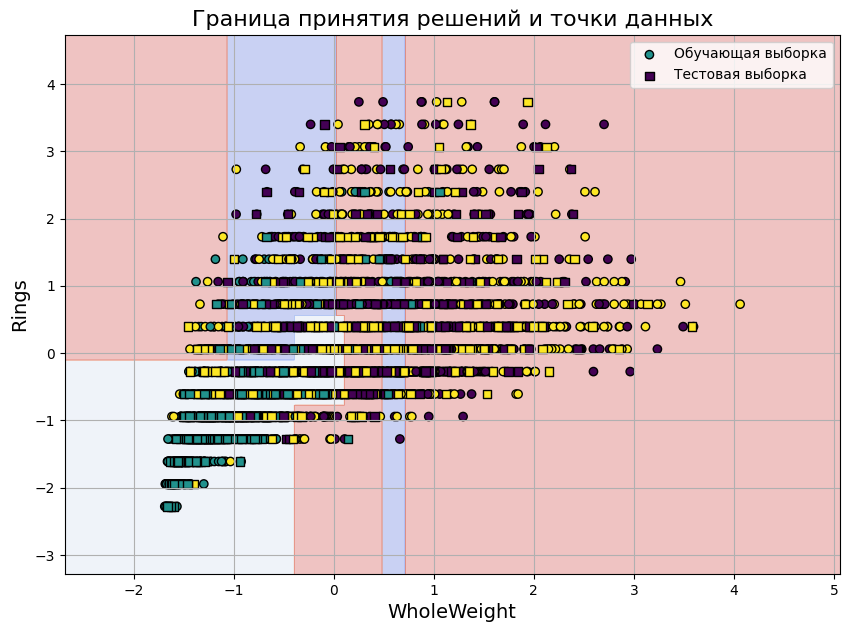

In [ ]:
import matplotlib.pyplot as plt
# Визуализация границы принятия решений
# Создаем сетку для визуализации
x_min, x_max = X['WholeWeight'].min() - 1, X['WholeWeight'].max() + 1
y_min, y_max = X['Rings'].min() - 1, X['Rings'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Создаем DataFrame из сетки
grid_data = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['WholeWeight', 'Rings'])

# Предсказание на сетке
Z = classification.predict(grid_data)
Z = Z.reshape(xx.shape)

# Визуализация границы принятия решений
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train['WholeWeight'], X_train['Rings'], c=y_train, edgecolor='k', marker='o', label='Обучающая выборка')
plt.scatter(X_test['WholeWeight'], X_test['Rings'], c=y_test, edgecolor='k', marker='s', label='Тестовая выборка')
plt.xlabel('WholeWeight', fontsize=14)
plt.ylabel('Rings', fontsize=14)
plt.title('Граница принятия решений и точки данных', fontsize=16)
plt.legend()
plt.grid()
plt.show()

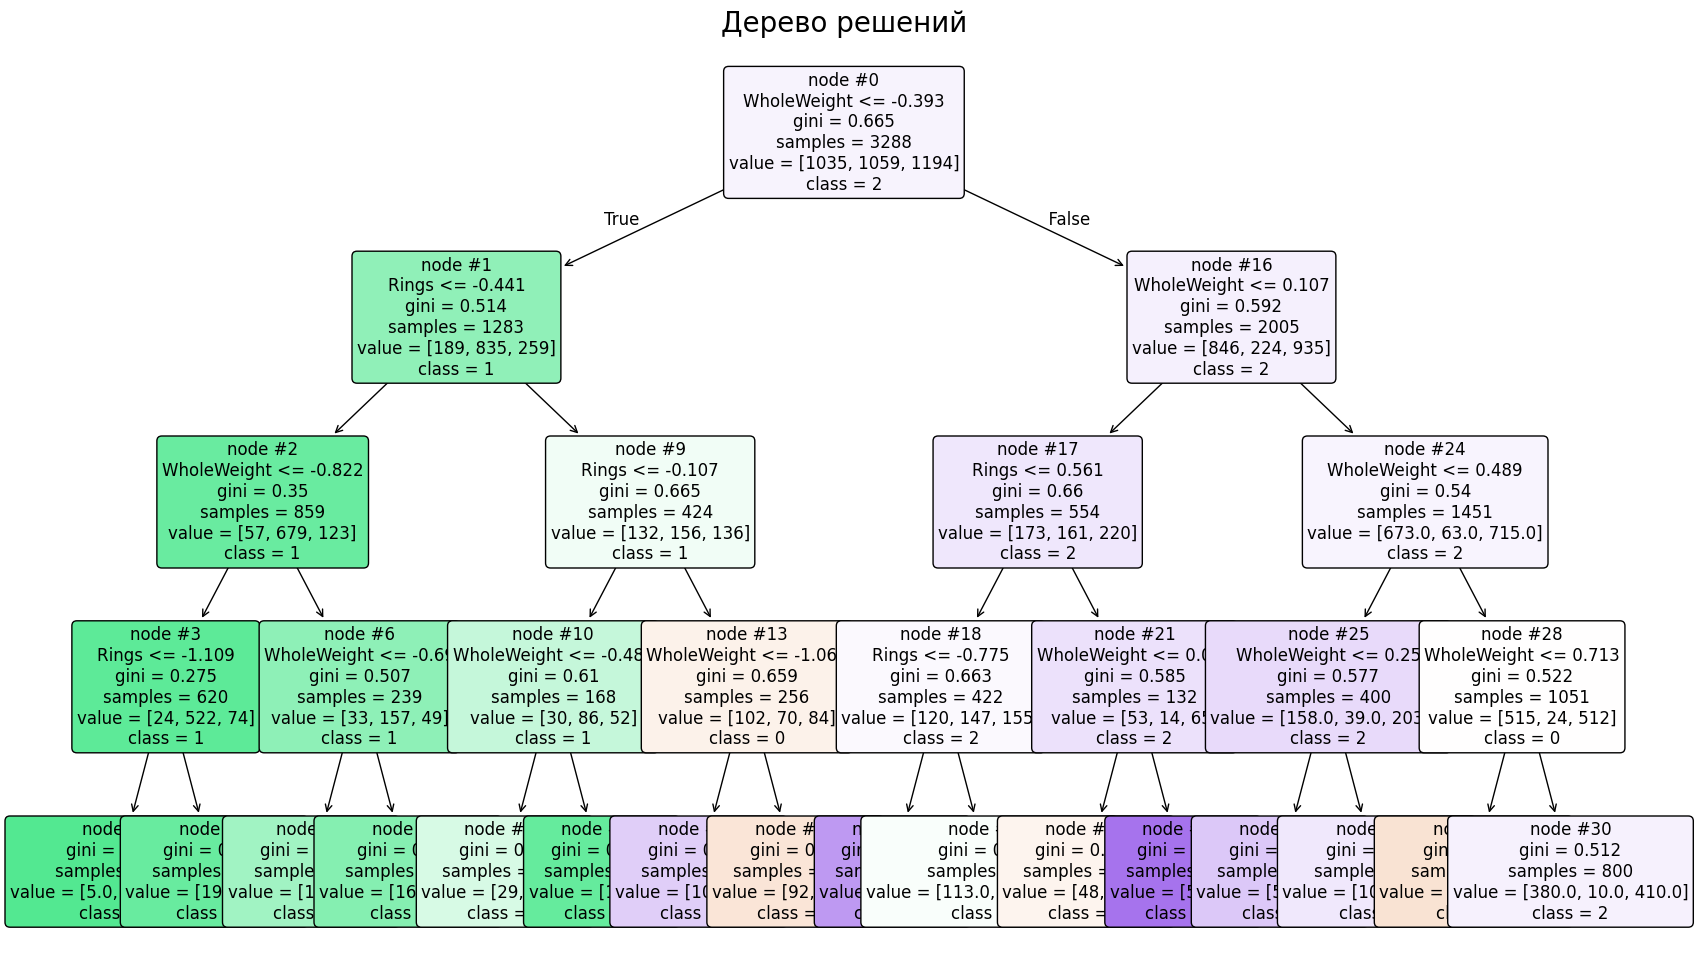

In [ ]:

# Визуализация дерева решений с улучшенной видимостью
plt.figure(figsize=(20, 12))  # Увеличиваем размер фигуры
plot_tree(classification, filled=True, feature_names=X.columns, class_names=np.unique(y).astype(str),
          rounded=True, fontsize=12, node_ids=True)  # Увеличиваем размер шрифта
plt.title('Дерево решений', fontsize=20)  # Заголовок с увеличенным шрифтом
plt.show()

###7. Постройте и обучите дополнительные базовые классификаторы, указанные в индивидуальном задании, затем постройте из классификатора дерева решений и дополнительных классификаторов комбинированный классификатор, указанный в индивидуальном задании. Оцените производительность базовых классификаторов и комбинированного классификатора по показателю, указанному в индивидуальном задании.


In [ ]:
# Импорт необходимых библиотек
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 1. Обучение наивного байесовского классификатора
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_naive_bayes = naive_bayes.predict(X_test)
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
print(f'Доля верных ответов на тестовой выборке (Наивный Байес): {accuracy_naive_bayes:.2f}')

# 2. Обучение классификатора ближайших соседей (KNN)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Доля верных ответов на тестовой выборке (KNN): {accuracy_knn:.2f}')

# 3. Создание комбинированного классификатора (StackingClassifier)
classifiers = [
    ('decision_tree', classification),  # Дерево решений
    ('naive_bayes', naive_bayes),       # Наивный байес
    ('knn', knn)                        # KNN
]

stacking_classifier = StackingClassifier(estimators=classifiers, final_estimator=DecisionTreeClassifier())
stacking_classifier.fit(X_train, y_train)

# 4. Оценка производительности комбинированного классификатора
y_pred_stacking = stacking_classifier.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f'Доля верных ответов на тестовой выборке (Комбинированный классификатор): {accuracy_stacking:.2f}')

Доля верных ответов на тестовой выборке (Наивный Байес): 0.56
Доля верных ответов на тестовой выборке (KNN): 0.51
Доля верных ответов на тестовой выборке (Комбинированный классификатор): 0.50


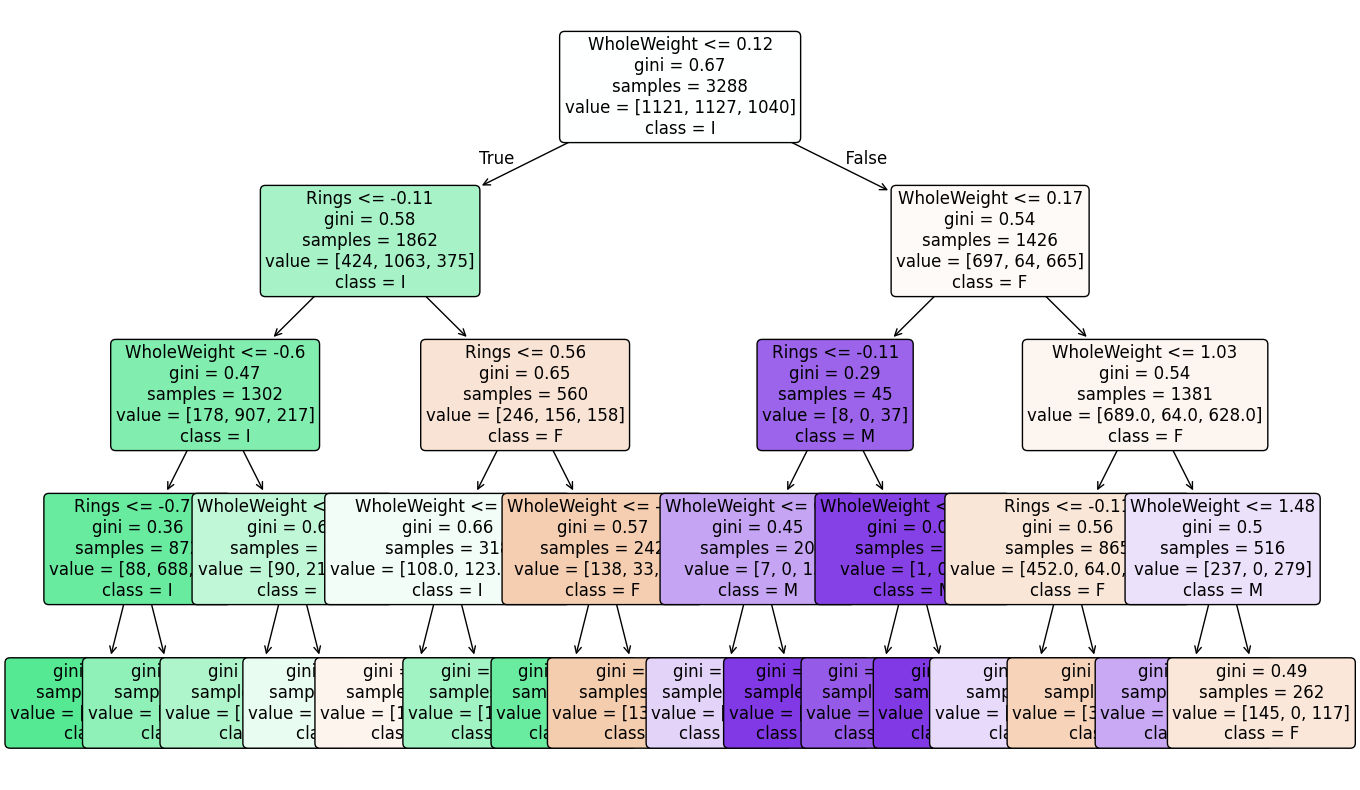

In [ ]:
# Получение предсказаний на обучающей выборке
stacked_predictions = stacking_classifier.predict(X_train)

# Обучение нового дерева решений на предсказаниях
decision_tree1 = DecisionTreeClassifier(max_depth=4, random_state=42)
decision_tree1.fit(X_train, stacked_predictions)

# Визуализация нового дерева решений с улучшенной читаемостью
plt.figure(figsize=(16, 10))  # Увеличиваем размер фигуры
plt.title('Дерево решений (на основе комбинированного классификатора)', fontsize=16)

# Настройки для улучшения визуализации
plot_tree(
    decision_tree1,
    feature_names=['WholeWeight', 'Rings'],  # Названия признаков
    class_names=label_encoder.classes_,  # Названия классов
    filled=True,  # Заливка цветом
    fontsize=12,  # Размер шрифта
    rounded=True,  # Закругленные углы
    precision=2  # Количество знаков после запятой для вероятностей
)
plt.show()  # Отображение дерева


###8. Постройте и обучите пару ансамблевых классификаторов, указанных в индивидуальном задании, и сравните их производительность по показателю, указанному в индивидуальном задании.

In [ ]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import recall_score

# Создание и обучение BaggingClassifier
Bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=4), n_estimators=50, random_state=42)
Bagging_classifier.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_Bagging = Bagging_classifier.predict(X_test)

# Оценка полноты (recall) для BaggingClassifier
recall_Bagging = recall_score(y_test, y_pred_Bagging, average='weighted')
print(f'Полнота (recall) для BaggingClassifier: {recall_Bagging:.2f}')

# Создание и обучение AdaBoostClassifier
Ada_Boost_classifier = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4), n_estimators=50, algorithm='SAMME', random_state=42)
Ada_Boost_classifier.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_adaboost = Ada_Boost_classifier.predict(X_test)

# Оценка полноты (recall) для AdaBoostClassifier
recall_adaboost = recall_score(y_test, y_pred_adaboost, average='weighted')
print(f'Полнота (recall) для AdaBoostClassifier: {recall_adaboost:.2f}')


Полнота (recall) для BaggingClassifier: 0.54
Полнота (recall) для AdaBoostClassifier: 0.52


###9. Постройте границы принятия решений ансамблевых классификаторов с визуализацией точек набора данных разных классов разными цветами. Подпишите оси и рисунок.

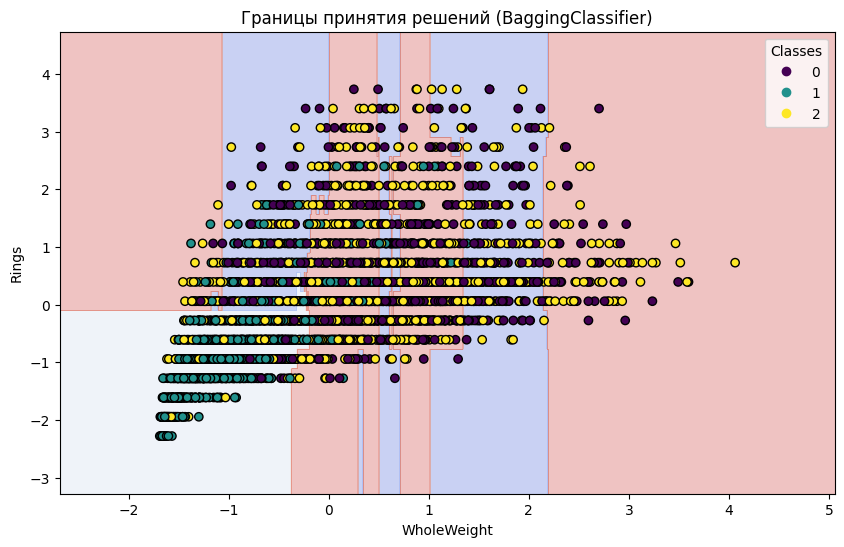

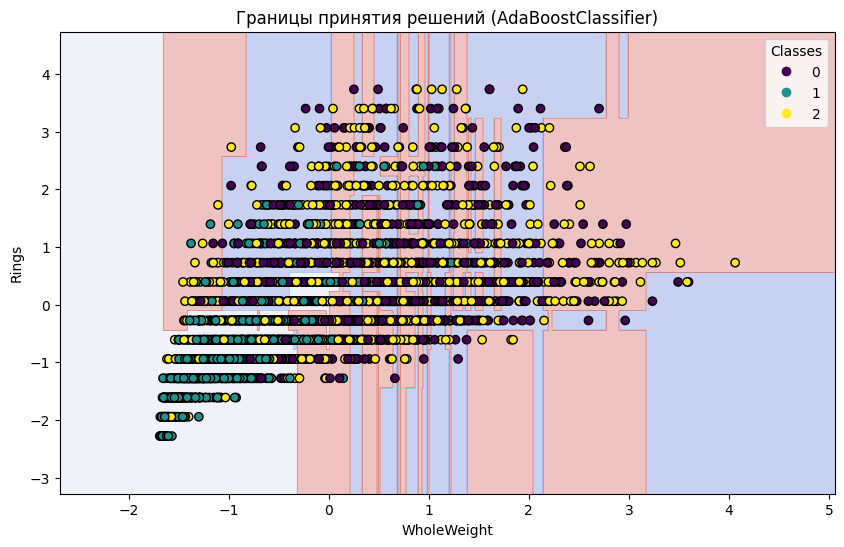

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для визуализации границ принятия решений
def plot_decision_boundaries(classifier, X, y, title):
    # Создание сетки для визуализации
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Предсказание на сетке
    Z = classifier.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X.columns))
    Z = Z.reshape(xx.shape)

    # Визуализация
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', marker='o', label='Данные')
    plt.xlabel('WholeWeight')
    plt.ylabel('Rings')
    plt.title(title)
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.show()

# Визуализация границ принятия решений для BaggingClassifier
plot_decision_boundaries(Bagging_classifier, X, y, "Границы принятия решений (BaggingClassifier)")

# Визуализация границ принятия решений для AdaBoostClassifier
plot_decision_boundaries(Ada_Boost_classifier, X, y, "Границы принятия решений (AdaBoostClassifier)")